In [1]:
# source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd
import seaborn as sns

# Colunas mapeadas

In [86]:
colunas_interesse = [
    "V0001",  # Unidade da Federação
    "V0026",  # Tipo de situação censitária
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06701",  # Em que data foi o último parto?
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

# Colunas principais - Não cabe na memória o dataset completo

Módulos de interesse

- Modulo A, B e D: Contêm informações sociodemográficas 
- Modulo L: Crianças com menos de 2 anos 
- Módulo R: Saúde da Mulher 
- Modulo S: Pré-natal 
- Modulo W: Antropometria


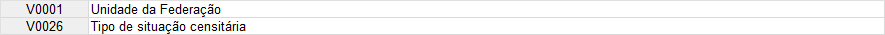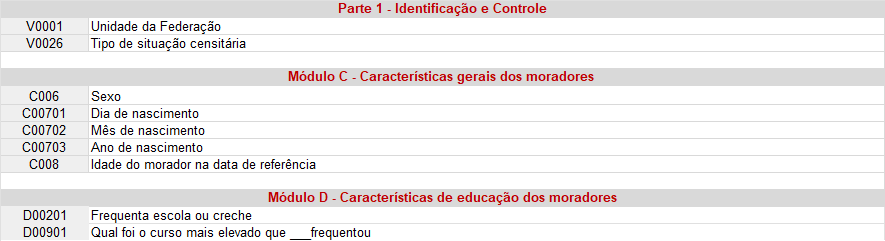

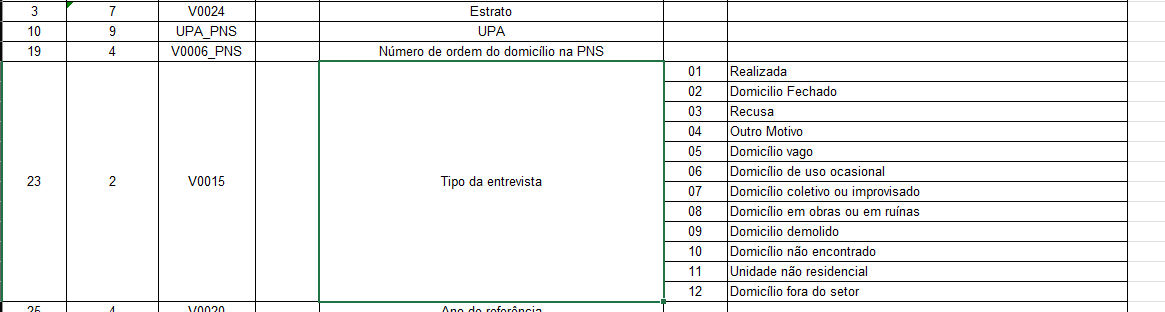

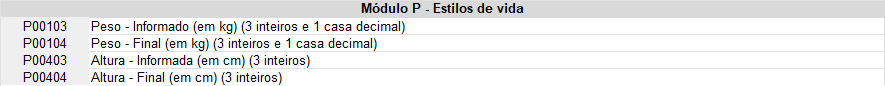

# Analise de Dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
from tqdm import tqdm

In [4]:

dataframes = []

# Lista das colunas de interesse (ajustar conforme os nomes reais do CSV)
colunas_interesse = [
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "C001", # Quantidade de pessoas no domicilio
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    "C006",   # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",   # Idade
    "P00103", # Peso informado
    "P00104", # Peso final
    "P00403", # Altura informada
    "P00404",  # Altura final
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
]


for i in tqdm(range(21)):  # Arquivos de 0 a 20
    df = pd.read_csv(f"https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/pns2019_{i}.csv", usecols=colunas_interesse)
    #df = pd.read_csv(f"pns2019_{i}.csv")
    dataframes.append(df)
# Armazenar em um unico Dataframe
pns_2019 = pd.concat(dataframes, ignore_index=True)
pns_2019.info(show_counts=True, verbose=True)

100%|██████████| 21/21 [01:11<00:00,  3.39s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V0001      293726 non-null  int64  
 1   V0024      293726 non-null  int64  
 2   UPA_PNS    293726 non-null  int64  
 3   V0006_PNS  293726 non-null  int64  
 4   V0015      293726 non-null  int64  
 5   V0022      279382 non-null  float64
 6   V0026      293726 non-null  int64  
 7   V0031      293726 non-null  int64  
 8   C001       279382 non-null  float64
 9   C00301     279382 non-null  float64
 10  C006       279382 non-null  float64
 11  C00701     279382 non-null  float64
 12  C00702     279382 non-null  float64
 13  C00703     279382 non-null  float64
 14  C008       279382 non-null  float64
 15  P00103     83073 non-null   float64
 16  P00104     89954 non-null   float64
 17  P00403     75637 non-null   float64
 18  P00404     89954 non-null   float64
 19  W001       7060 non-nul

In [5]:
pns_2019['chave_domicio'] = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str)
pns_2019['chave_pessoa']  = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str) + '_' + pns_2019['C00301'].astype(str)

In [6]:
df = pns_2019.copy()
# Dicionário para renomear as colunas
rename_columns = {
    "V0001": "UF",
    "V0024":"Estrato",
    "UPA_PNS":"UPA",
    "V0006_PNS":"N_ordem_domicilio_PNS",
    "C00301":"N_ordem_morador",
    "C001":"N_pessoas_domicilio",
    "V0022":"Quantidade_moradores",
    "V0015":'tipo_entrevista',
    "V0026": "regiao_metropolitana",
    "V0031": "capital_metropolitana",
    "C006": "sexo",
    "C00701": "dia_nascimento",
    "C00702": "mes_nascimento",
    "C00703": "ano_nascimento",
    "C008": "idade",
    "P00103": "peso_info_kg",
    "P00104": "peso_final_kg",
    "P00403": "altura_info_cm",
    "P00404": "altura_final_cm",
    "W001": "antropometria_aferida_morador",
    "W00101": "peso_1_pesagem_kg",
    "W00102": "peso_2_pesagem_kg",
    "W00103": "peso_final_medido_kg",
    "W00201": "altura_1_medicao_cm",
    "W00202": "altura_2_medicao_cm",
    "W00203": "altura_final_medida_cm",
}

# Renomear as colunas no DataFrame
df.rename(columns=rename_columns, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   UF                             293726 non-null  int64  
 1   Estrato                        293726 non-null  int64  
 2   UPA                            293726 non-null  int64  
 3   N_ordem_domicilio_PNS          293726 non-null  int64  
 4   tipo_entrevista                293726 non-null  int64  
 5   Quantidade_moradores           279382 non-null  float64
 6   regiao_metropolitana           293726 non-null  int64  
 7   capital_metropolitana          293726 non-null  int64  
 8   N_pessoas_domicilio            279382 non-null  float64
 9   N_ordem_morador                279382 non-null  float64
 10  sexo                           279382 non-null  float64
 11  dia_nascimento                 279382 non-null  float64
 12  mes_nascimento                

In [8]:
# Verificar porcentagem de dados nulos em cada coluna
null_percentages = (df.isnull().sum() / len(df)) * 100

# Exibir o resultado
null_percentages = null_percentages.sort_values(ascending=False)
null_percentages

altura_1_medicao_cm              97.766286
altura_2_medicao_cm              97.766286
peso_2_pesagem_kg                97.763562
peso_1_pesagem_kg                97.763562
peso_final_medido_kg             97.708749
altura_final_medida_cm           97.708749
antropometria_aferida_morador    97.596399
altura_info_cm                   74.249130
peso_info_kg                     71.717519
peso_final_kg                    69.374860
altura_final_cm                  69.374860
N_pessoas_domicilio               4.883463
Quantidade_moradores              4.883463
sexo                              4.883463
N_ordem_morador                   4.883463
idade                             4.883463
ano_nascimento                    4.883463
mes_nascimento                    4.883463
dia_nascimento                    4.883463
UPA                               0.000000
regiao_metropolitana              0.000000
tipo_entrevista                   0.000000
capital_metropolitana             0.000000
N_ordem_dom

In [9]:
# Preencher a coluna de estado
estados = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal",
}

df['UF_sigla'] = df['UF'].map(estados)

# Mapeamento direto de estados para suas macroregiões
estado_para_regiao = {
    "Rondônia": "Norte",
    "Acre": "Norte",
    "Amazonas": "Norte",
    "Roraima": "Norte",
    "Pará": "Norte",
    "Amapá": "Norte",
    "Tocantins": "Norte",
    "Maranhão": "Nordeste",
    "Piauí": "Nordeste",
    "Ceará": "Nordeste",
    "Rio Grande do Norte": "Nordeste",
    "Paraíba": "Nordeste",
    "Pernambuco": "Nordeste",
    "Alagoas": "Nordeste",
    "Sergipe": "Nordeste",
    "Bahia": "Nordeste",
    "Minas Gerais": "Sudeste",
    "Espírito Santo": "Sudeste",
    "Rio de Janeiro": "Sudeste",
    "São Paulo": "Sudeste",
    "Paraná": "Sul",
    "Santa Catarina": "Sul",
    "Rio Grande do Sul": "Sul",
    "Mato Grosso do Sul": "Centro-Oeste",
    "Mato Grosso": "Centro-Oeste",
    "Goiás": "Centro-Oeste",
    "Distrito Federal": "Centro-Oeste",
}

# Adicionar a coluna 'regiao_brasileira' ao DataFrame
df['regiao_brasileira'] = df['UF_sigla'].map(estado_para_regiao)

#Mapear região
regiao = {
    1: "Urbano",
    2: "Rural",
}
df['regiao_metropolitana'] = df['regiao_metropolitana'].map(regiao)

# Dicionário de mapeamento
regioes_map = {
    1: "Capital",
    2: "Região Metropolitana, excluindo a capital",
    3: "RIDE, excluindo a capital",
    4: "Interior"
}
df['capital_metropolitana'] = df['capital_metropolitana'].map(regioes_map)

# Dicionário de Sexo
sexo = {
    1: "Masculino",
    2: "Feminino"
}
df['sexo'] = df['sexo'].map(sexo)

# Pesquisa realizada
status_domicilios = {
    1: "Realizada",
    2: "Domicílio Fechado",
    3: "Recusa",
    4: "Outro Motivo",
    5: "Domicílio Vago",
    6: "Domicílio de uso ocasional",
    7: "Domicílio coletivo ou improvisado",
    8: "Domicílio em obras ou em ruínas",
    9: "Domicílio demolido",
    10: "Domicílio não encontrado",
    11: "Unidade não residencial",
    12: "Domicílio fora do setor",
}
df['tipo_entrevista'] = df['tipo_entrevista'].map(status_domicilios)

In [10]:
df.shape, df.drop_duplicates().shape

((293726, 30), (293726, 30))

In [11]:
cols = df.columns
for col in cols:
  print(df[col].value_counts(dropna=False))
  print('\n\n')

UF
35    18504
21    17912
31    15421
23    15281
33    14776
15    14393
13    13074
26    12381
41    11694
29    11061
32    10673
42    10607
27    10474
43    10369
25    10094
24     9964
22     9044
50     8766
52     8506
14     8476
12     8270
28     8140
53     7609
51     7607
11     7391
16     6640
17     6599
Name: count, dtype: int64



Estrato
1210010    3691
1410011    3138
2710111    2720
2410011    2569
1250020    2484
           ... 
3220020      61
4230020      54
3321020      54
4220020      47
3532020      45
Name: count, Length: 574, dtype: int64



UPA
130033536    94
160007292    93
140004603    88
140008399    87
140002449    86
             ..
350286470    14
410182027    14
270018200    14
210092069    13
230030392    12
Name: count, Length: 8031, dtype: int64



N_ordem_domicilio_PNS
2     21905
7     21764
11    21746
1     21743
12    21723
10    21707
3     21643
6     21587
9     21552
5     21525
8     21503
4     21208
13    10242
15    10228
14   

# Dados não informados na pesquisa

5% - 16342 não informaram Data de nascimento

67,8% sem informação de peso e Altura

Sessão W - 2,5% dos entrevistados foram Aferidos

# Limpeza

- Somente entrevistas realizadas
- Informações de Idade


In [12]:
print('Antes:', df.shape)
# Entrevistas realizadas
df = df[df['tipo_entrevista']=='Realizada'].reset_index(drop=True)
print('Depois:', df.shape)

Antes: (293726, 30)
Depois: (279382, 30)


In [13]:
print('Antes:', df.shape)
# Idade Informada
df = df[~df['idade'].isna()].reset_index(drop=True)
print('Depois:', df.shape)

Antes: (279382, 30)
Depois: (279382, 30)


# Criação de novas Features

## Ano Nascimento Inferido pela idade

In [14]:
df['ano_nascimento_inferido'] = np.where(df['ano_nascimento']==9999, 2019 - df['idade'], df['ano_nascimento'])

## IMC

In [15]:
# Calcular o IMC
# Função para calcular o IMC
def calcular_imc(row):
    """
    Calcula o IMC com base no peso (kg) e altura (cm).
    :param row: Linha do DataFrame.
    :return: Valor do IMC (float) ou None se peso ou altura forem nulos.
    """
    if pd.notnull(row['peso']) and pd.notnull(row['altura']) and row['altura'] > 0:
        altura_metros = row['altura'] / 100  # Converter altura de cm para metros
        return row['peso'] / (altura_metros ** 2)
    return None

# Função para classificar o IMC
def classificar_imc(imc):
    if pd.isnull(imc):
        return None, None
    elif imc < 18.5:
        return "Magreza", 0
    elif 18.5 <= imc < 25:
        return "Normal", 0
    elif 25.0 <= imc < 30:
        return "Sobrepeso", 1
    elif 30.0 <= imc < 40:
        return "Obesidade", 2
    elif imc >= 40.0:
        return "Obesidade Grave", 3
    return None, None


In [16]:
# Peso unico, usar medido, ou informado
df['peso'] = np.where(df['peso_final_kg'].isna(), df['peso_info_kg'], df['peso_final_kg'])
# Peso Altura, usar medido, ou informado
df['altura'] = np.where(df['altura_final_cm'].isna(), df['altura_info_cm'], df['altura_final_cm'])

# Aplicar a função ao DataFrame
df['imc'] = df.apply(calcular_imc, axis=1)

# Aplicar a função e criar as colunas 'imc_classificacao' e 'imc_grau_obesidade'
df[['imc_classificacao', 'imc_grau_obesidade']] = df['imc'].apply(
    lambda x: pd.Series(classificar_imc(x))
)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279382 entries, 0 to 279381
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   UF                             279382 non-null  int64  
 1   Estrato                        279382 non-null  int64  
 2   UPA                            279382 non-null  int64  
 3   N_ordem_domicilio_PNS          279382 non-null  int64  
 4   tipo_entrevista                279382 non-null  object 
 5   Quantidade_moradores           279382 non-null  float64
 6   regiao_metropolitana           279382 non-null  object 
 7   capital_metropolitana          279382 non-null  object 
 8   N_pessoas_domicilio            279382 non-null  float64
 9   N_ordem_morador                279382 non-null  float64
 10  sexo                           279382 non-null  object 
 11  dia_nascimento                 279382 non-null  float64
 12  mes_nascimento                

# Gráficos

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

Quantidade_moradores: 279382 valores válidos de 279382 totais


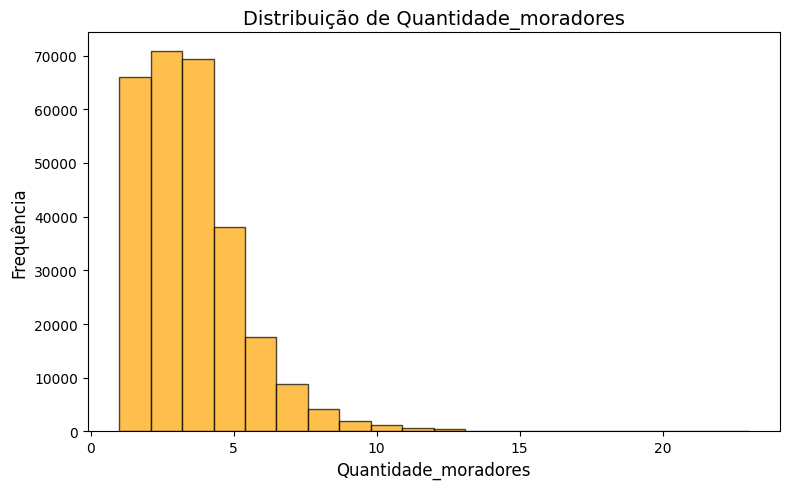

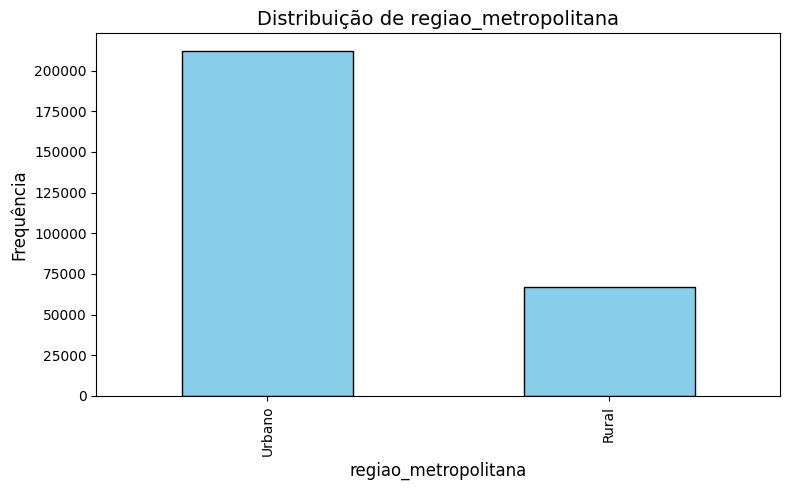

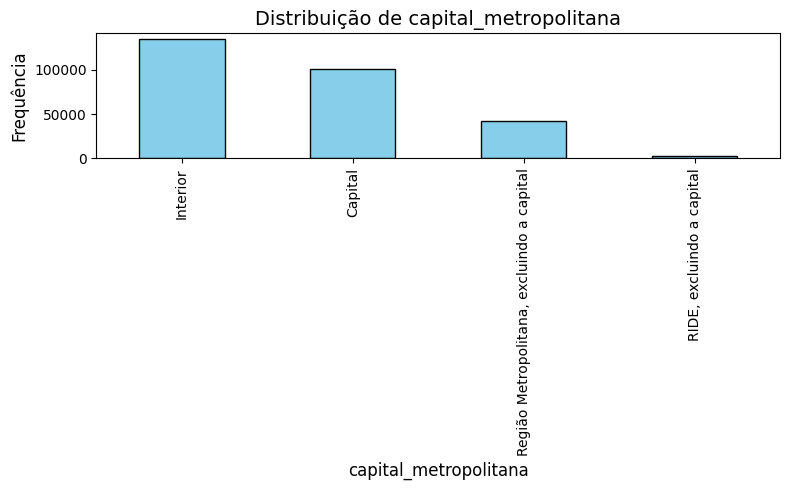

N_pessoas_domicilio: 279382 valores válidos de 279382 totais


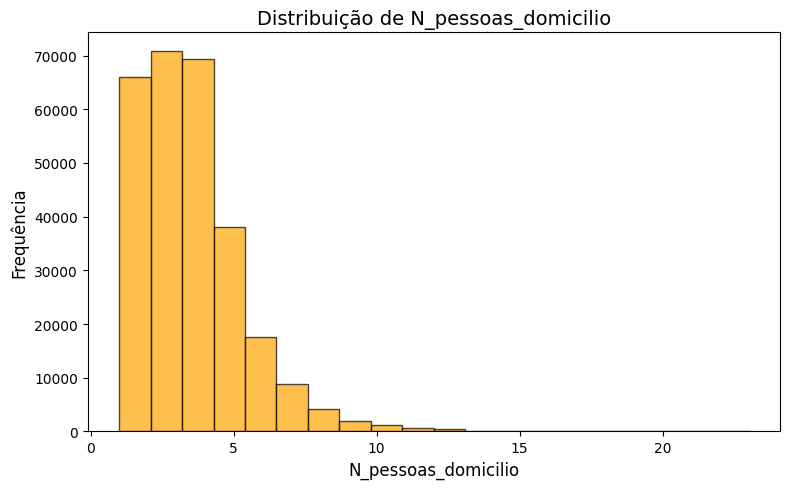

N_ordem_morador: 279382 valores válidos de 279382 totais


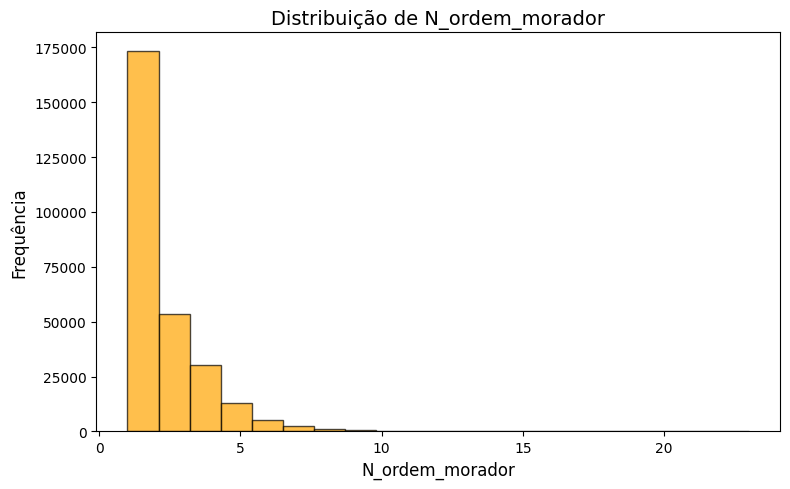

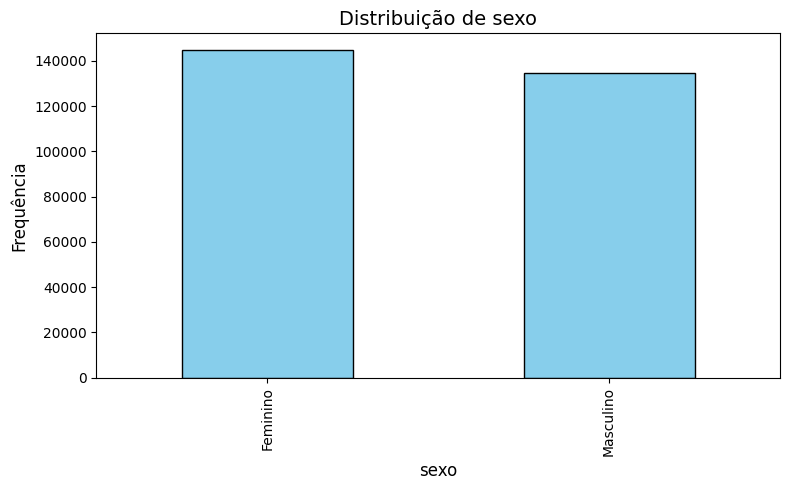

dia_nascimento: 279382 valores válidos de 279382 totais


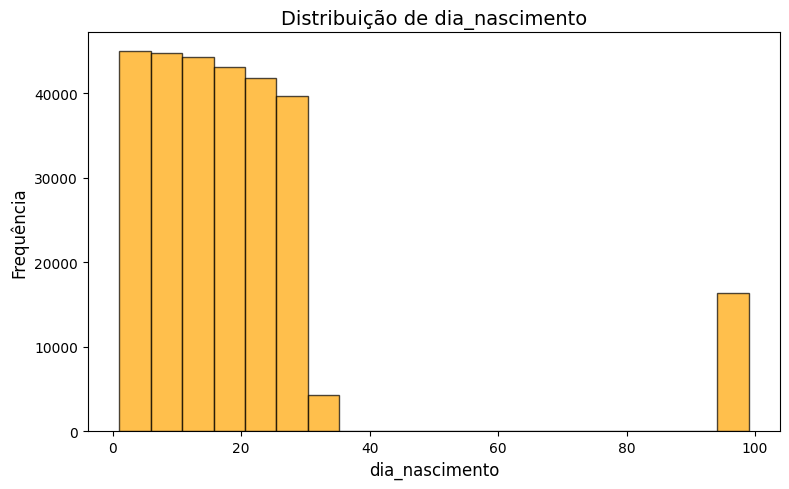

mes_nascimento: 279382 valores válidos de 279382 totais


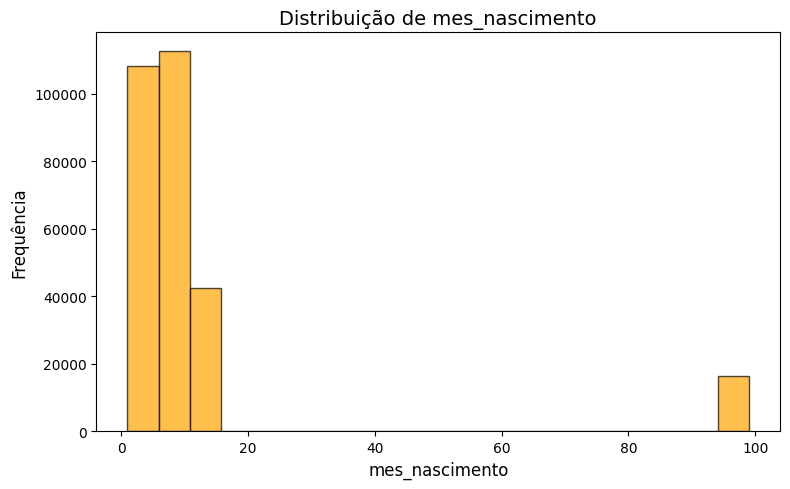

ano_nascimento: 279382 valores válidos de 279382 totais


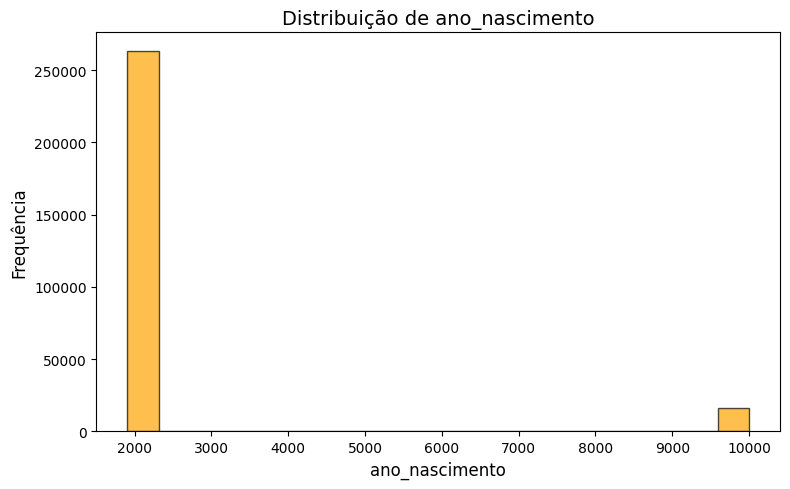

idade: 279382 valores válidos de 279382 totais


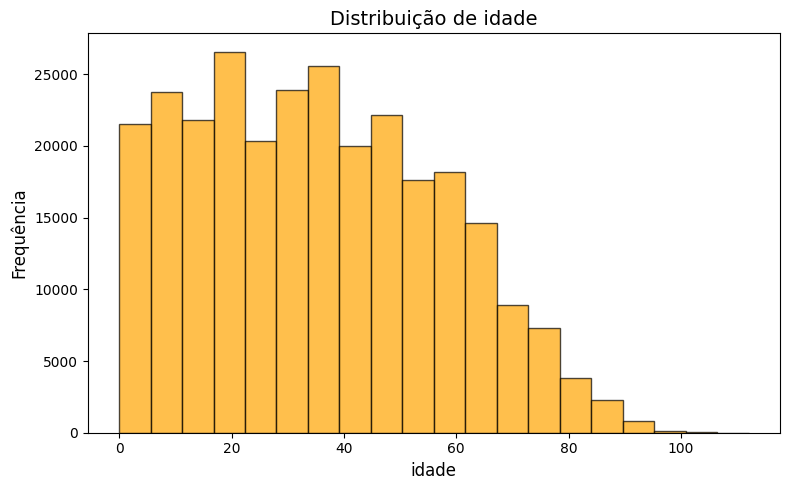

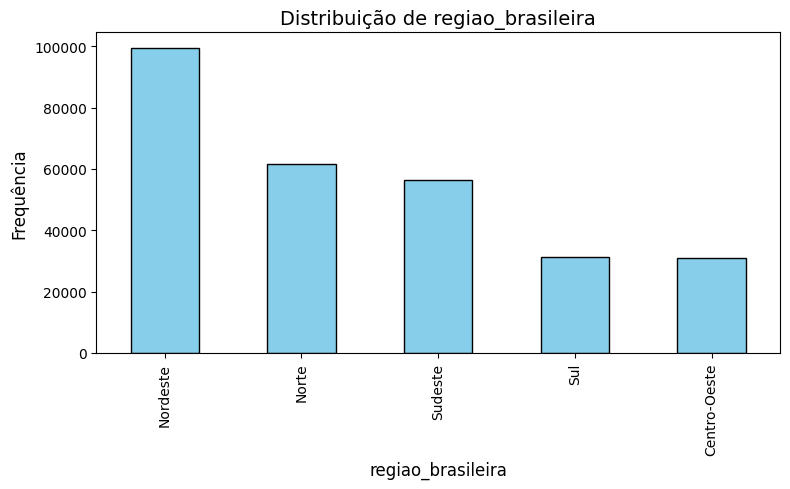

peso: 89954 valores válidos de 279382 totais


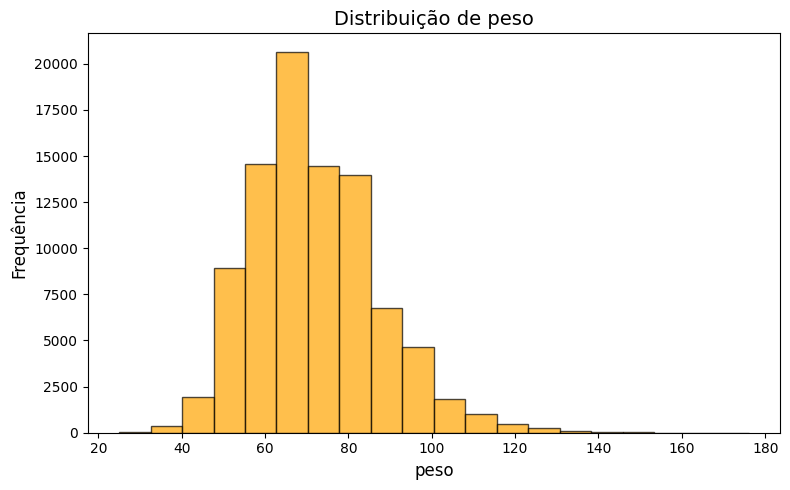

altura: 89954 valores válidos de 279382 totais


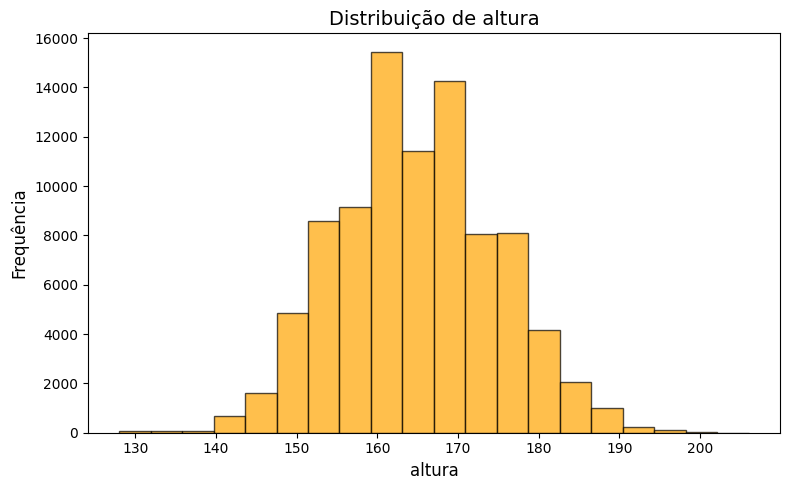

imc: 89954 valores válidos de 279382 totais


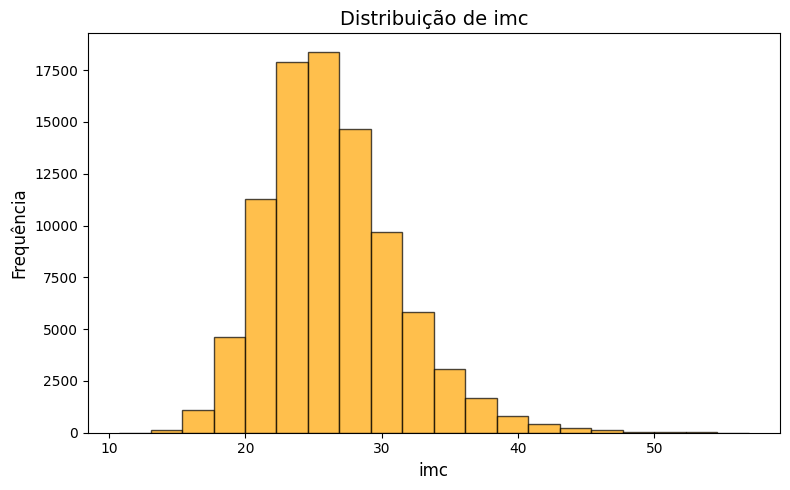

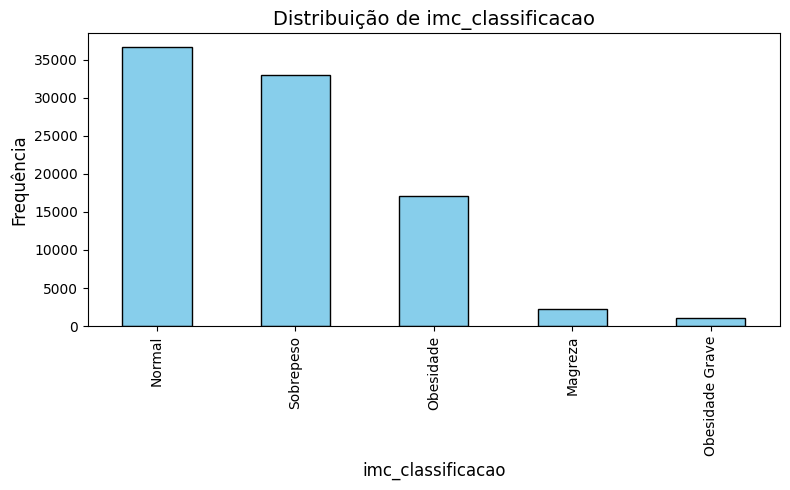

imc_grau_obesidade: 89954 valores válidos de 279382 totais


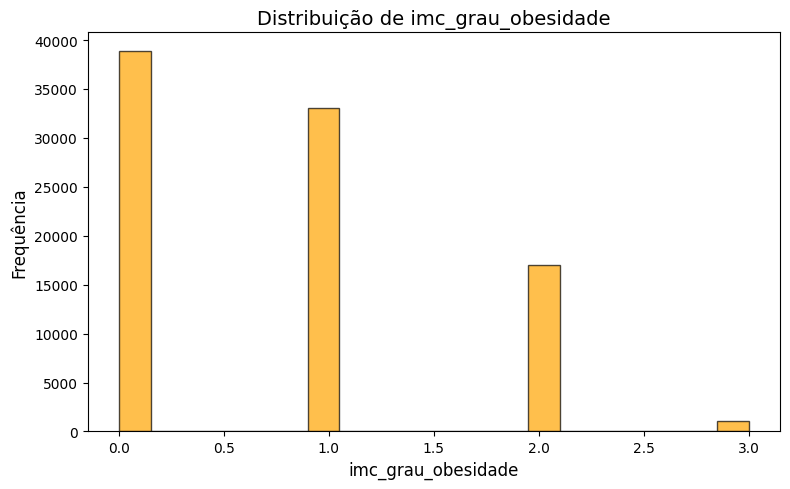

In [18]:
def plot_graphs_with_null_check(df, cols):
    df = df.copy()
    for col in cols:
        plt.figure(figsize=(8, 5))

        # Categorias (object)
        if df[col].dtype == "object":
            df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
            plt.title(f"Distribuição de {col}", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)

        # Numéricos (float64), ignorando nulos
        elif pd.api.types.is_float_dtype(df[col]):
            valid_data = df[col].dropna()  # Remove valores nulos
            print(f"{col}: {len(valid_data)} valores válidos de {len(df[col])} totais")

            valid_data.plot(kind="hist", bins=20, color="orange", edgecolor="black", alpha=0.7)
            plt.title(f"Distribuição de {col}", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)

        plt.tight_layout()
        plt.show()

cols = ['UF', 'Estrato', 'UPA', 'N_ordem_domicilio_PNS',
       'Quantidade_moradores', 'regiao_metropolitana', 'capital_metropolitana',
       'N_pessoas_domicilio', 'N_ordem_morador', 'sexo', 'dia_nascimento',
       'mes_nascimento', 'ano_nascimento', 'idade', 'regiao_brasileira', 'peso', 'altura', 'imc',
       'imc_classificacao', 'imc_grau_obesidade']
# Chamando a função com verificação
plot_graphs_with_null_check(df, cols)


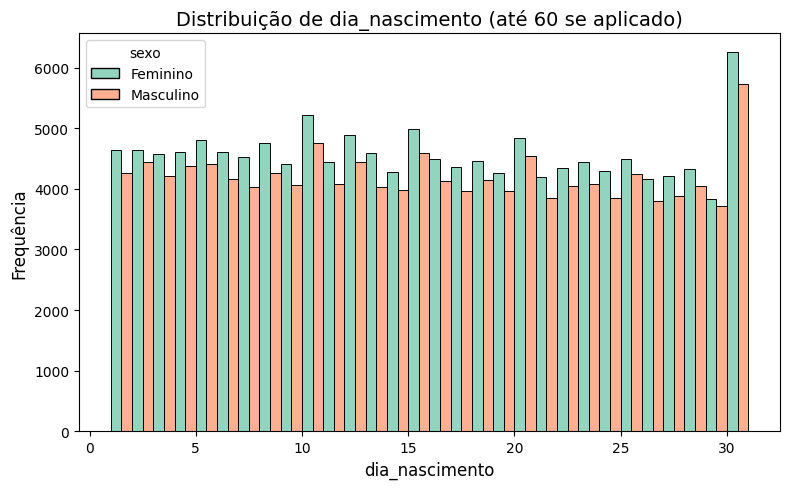

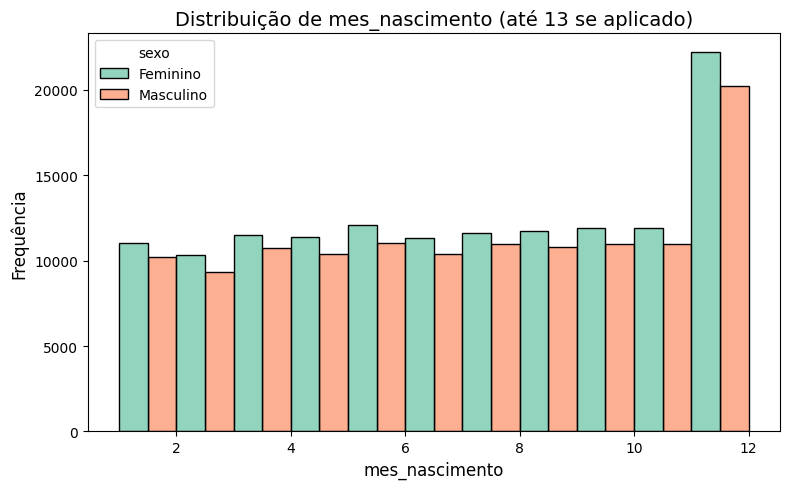

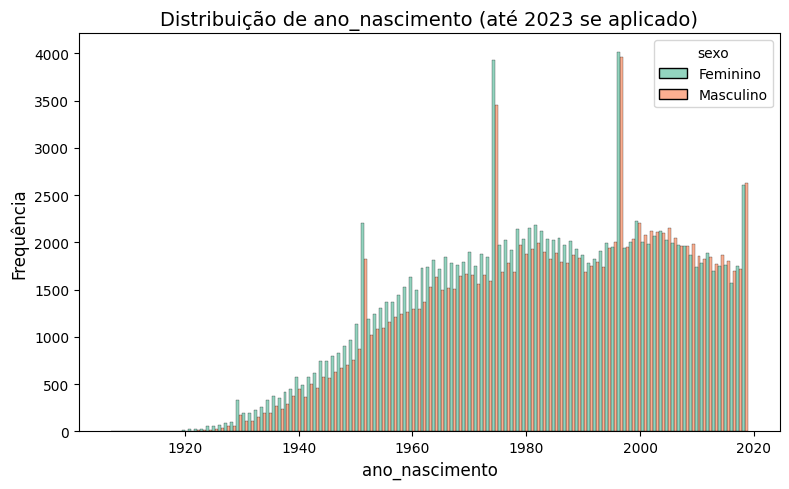

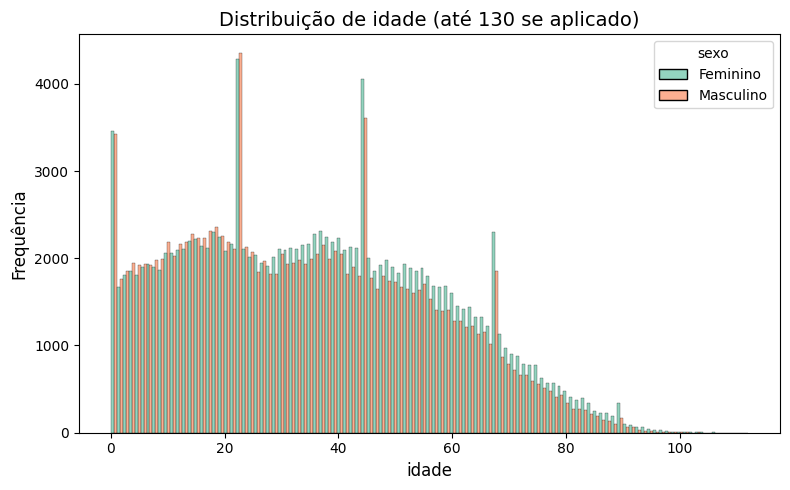

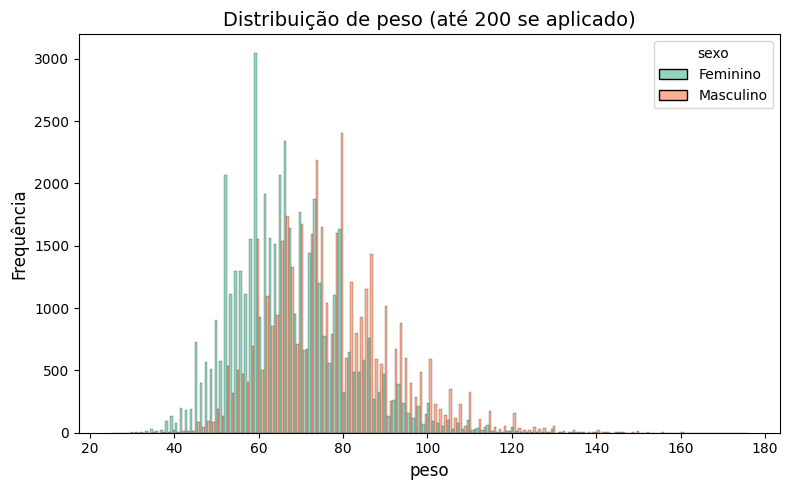

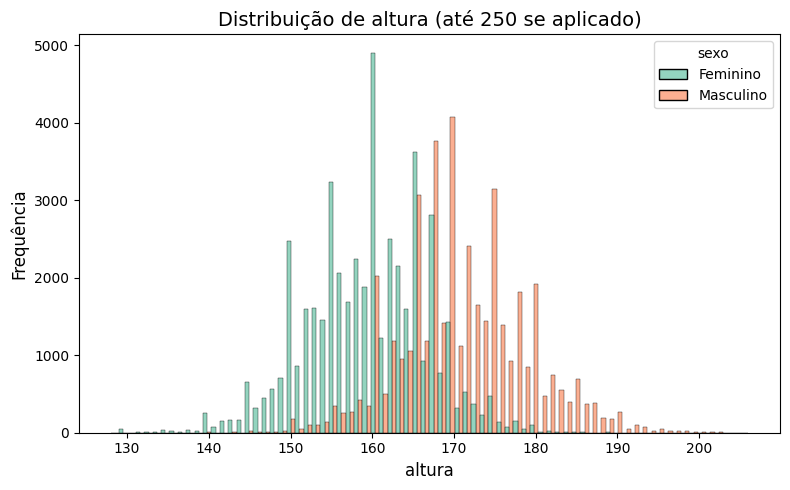

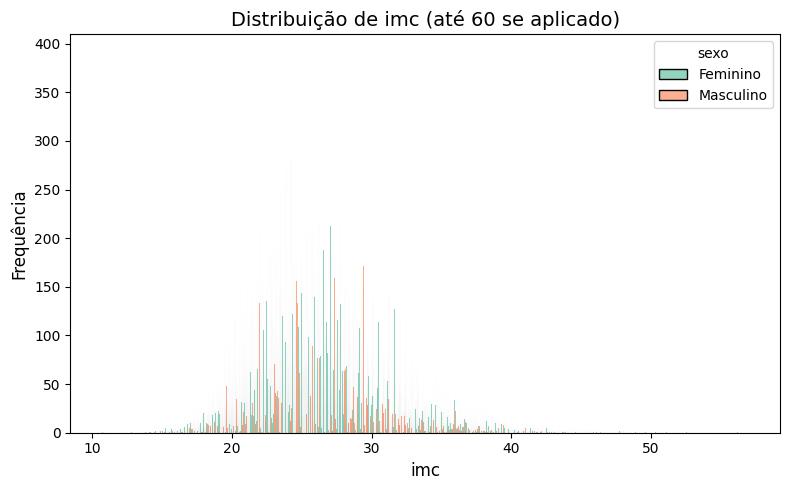

In [19]:
def plot_filtered_columns_with_hue(df, columns_limits, hue=None):
    """
    Plota histogramas para as colunas numéricas selecionadas, filtrando valores abaixo de limites específicos,
    e separando os dados com base em uma variável categórica (hue).

    :param df: DataFrame do Pandas contendo os dados.
    :param columns_limits: Dicionário onde a chave é o nome da coluna e o valor é o limite para filtrar os dados.
    :param hue: Coluna categórica para dividir os dados (e.g., 'sexo').
    """
    df = df.copy()

    for col, limite in columns_limits.items():
        if col in df.columns and pd.api.types.is_float_dtype(df[col]):
            plt.figure(figsize=(8, 5))

            # Filtrar os dados abaixo do limite, se especificado
            filtered_df = df.dropna(subset=[col])
            if limite is not None:
                filtered_df = filtered_df[filtered_df[col] <= limite]

            # Plotar com ou sem hue
            if hue and hue in df.columns:
                sns.histplot(
                    data=filtered_df,
                    x=col,
                    hue=hue,
                    bins=(len(df[col].unique())-2),
                    palette="Set2",
                    kde=False,
                    edgecolor="black",
                    alpha=0.7,
                    multiple="dodge"
                )
            else:
                sns.histplot(
                    data=filtered_df,
                    x=col,
                    bins=len(df[col].unique()),
                    color="orange",
                    edgecolor="black",
                    alpha=0.7,
                    multiple="dodge"
                )

            # Títulos e etiquetas
            plt.title(f"Distribuição de {col} (até {limite} se aplicado)", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)
            plt.tight_layout()
            plt.show()

# Dicionário com colunas e seus respectivos limites
columns_limits = {
    "dia_nascimento": 60,
    "mes_nascimento": 13,
    "ano_nascimento": 2023,
    "idade": 130,
    "peso": 200,
    "altura": 250,
    "imc": 60
}

# Chamando a função com limites e hue='sexo'
plot_filtered_columns_with_hue(df, columns_limits, hue="sexo")


# Clusterização

## Grupo de Crianças de Até 6 anos de IDADE

variavel de Idade para segmentar - Referencia temporal das respostas na data da entrevista

### Verificação das idades

In [39]:
pd.set_option('display.max_rows', 100)

In [52]:
# Seguir com a variavel de Idade para segmentar - Referencia temporal das respostas na data da entrevista
df[(df.ano_nascimento>= 2012)&(df.ano_nascimento< 9999)]['idade'].value_counts(dropna=False)

idade
6.0    3616
4.0    3582
5.0    3508
3.0    3464
1.0    3411
0.0    3349
2.0    3270
7.0    2150
Name: count, dtype: int64

In [47]:
df[df.idade <= 6]['idade'].value_counts(dropna=False)

idade
6.0    3838
4.0    3807
5.0    3728
3.0    3665
1.0    3534
2.0    3432
0.0    3349
Name: count, dtype: int64

In [48]:
df[df.idade <= 6]['ano_nascimento'].value_counts(dropna=False)

ano_nascimento
2014.0    3618
2015.0    3558
2017.0    3474
2013.0    3463
2018.0    3272
2016.0    3265
2019.0    1962
2012.0    1588
9999.0    1153
Name: count, dtype: int64

### Filtro de crianças

In [84]:
df_children = df[(df.idade <= 6)].copy()

In [85]:
df_children.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25353 entries, 4 to 279373
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UF                             25353 non-null  int64  
 1   Estrato                        25353 non-null  int64  
 2   UPA                            25353 non-null  int64  
 3   N_ordem_domicilio_PNS          25353 non-null  int64  
 4   tipo_entrevista                25353 non-null  object 
 5   Quantidade_moradores           25353 non-null  float64
 6   regiao_metropolitana           25353 non-null  object 
 7   capital_metropolitana          25353 non-null  object 
 8   N_pessoas_domicilio            25353 non-null  float64
 9   N_ordem_morador                25353 non-null  float64
 10  sexo                           25353 non-null  object 
 11  dia_nascimento                 25353 non-null  float64
 12  mes_nascimento                 25353 non-null  flo

In [56]:
df_childs

,UF,Estrato,UPA,N_ordem_domicilio_PNS,tipo_entrevista,Quantidade_moradores,regiao_metropolitana,capital_metropolitana,N_pessoas_domicilio,N_ordem_morador,...,chave_domicio,chave_pessoa,UF_sigla,regiao_brasileira,ano_nascimento_inferido,peso,altura,imc,imc_classificacao,imc_grau_obesidade
4,11,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,5.0,...,11_1110011_110000016_1,11_1110011_110000016_1_5.0,Rondônia,Norte,2013.0,NaN,NaN,NaN,None,NaN
5,11,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,6.0,...,11_1110011_110000016_1,11_1110011_110000016_1_6.0,Rondônia,Norte,2015.0,NaN,NaN,NaN,None,NaN
16,11,1110011,110000016,3,Realizada,8.0,Urbano,Capital,8.0,7.0,...,11_1110011_110000016_3,11_1110011_110000016_3_7.0,Rondônia,Norte,2015.0,NaN,NaN,NaN,None,NaN
17,11,1110011,110000016,3,Realizada,8.0,Urbano,Capital,8.0,8.0,...,11_1110011_110000016_3,11_1110011_110000016_3_8.0,Rondônia,Norte,2016.0,NaN,NaN,NaN,None,NaN
20,11,1110011,110000016,5,Realizada,2.0,Urbano,Capital,2.0,2.0,...,11_1110011_110000016_5,11_1110011_110000016_5_2.0,Rondônia,Norte,2018.0,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279358,53,5310220,530044434,6,Realizada,5.0,Rural,Capital,5.0,5.0,...,53_5310220_530044434_6,53_5310220_530044434_6_5.0,Distrito Federal,Centro-Oeste,2013.0,NaN,NaN,NaN,None,NaN
279363,53,5310220,530044434,8,Realizada,6.0,Rural,Capital,6.0,5.0,...,53_5310220_530044434_8,53_5310220_530044434_8_5.0,Distrito Federal,Centro-Oeste,2014.0,NaN,NaN,NaN,None,NaN
279364,53,5310220,530044434,8,Realizada,6.0,Rural,Capital,6.0,6.0,...,53_5310220_530044434_8,53_5310220_530044434_8_6.0,Distrito Federal,Centro-Oeste,2018.0,NaN,NaN,NaN,None,NaN
279372,53,5310220,530044434,11,Realizada,4.0,Rural,Capital,4.0,3.0,...,53_5310220_530044434_11,53_5310220_530044434_11_3.0,Distrito Federal,Centro-Oeste,2012.0,NaN,NaN,NaN,None,NaN


In [25]:
df.ano_nascimento

0         1963.0
1         1950.0
2         1987.0
3         9999.0
4         9999.0
           ...  
279377    1986.0
279378    1970.0
279379    1935.0
279380    1997.0
279381    2006.0
Name: ano_nascimento, Length: 279382, dtype: float64